In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter


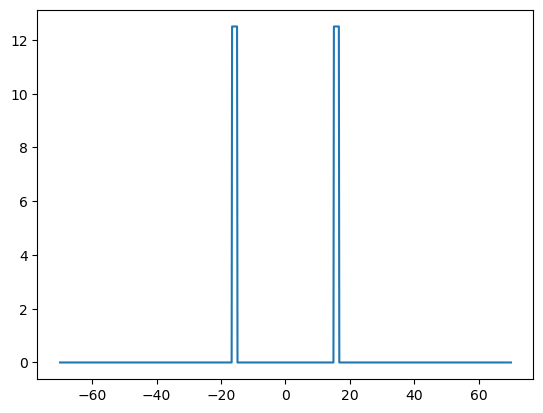

In [ ]:
# defining constants
m = 1 # mass of particle
hbar = 1 # reduced Planck's constant
std = 0.5
mean = -60
N = 1000
x = np.linspace(-70,70,N+2)
dx = x[1]-x[0]
k0 = 5
lamda  = hbar**2/(2*m*(dx**2))
v = 0*x
v0=1.7*(k0**2)/2*m
for i in range(len(v)):
    if x[i]<=-15 and x[i]>=-16.7:
        v[i]=12.5
    if x[i]>=15 and x[i]<=16.7:
        v[i]=12.5
        

plt.plot(x,v)

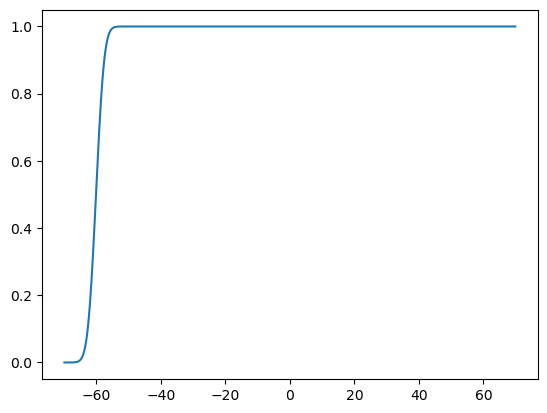

In [3]:
psi_0 = (np.exp( -(x[1:-1]-mean)**2/4*(std**2))/np.sqrt(std*np.sqrt(2*np.pi)))*np.exp(1j*k0*(x[1:-1]-mean))
A = np.cumsum((np.abs(psi_0**2))*dx)/4
plt.plot(x[1:-1],A)

In [4]:
H = lamda*(2*np.diag(np.ones(N)) - np.diag(np.ones(N-1),-1) - np.diag(np.ones(N-1),1) + (v[1:-1]/lamda)*np.diag(np.ones(N)))

In [5]:
E, psi = np.linalg.eigh(H)
B = np.sum(np.abs((psi[:,0])**2)*dx)
psi = psi/np.sqrt(B)

In [6]:
E[298]

21.222981460969788

In [7]:
c= 0*psi_0
for i in range(len(c)):
    c[i] = np.sum(psi_0*np.conj(psi[:,i])*dx)
c = c/np.sqrt(np.sum(np.abs(c)**2)) 
def Psi(t):
    return psi@(c*np.exp(-E*1j*t/hbar))/np.sqrt(7.150000000000343)

In [8]:
np.sum(np.abs(c[298:1000])**2)

6.188897412540755e-08

In [9]:
avgE = np.sum(E*np.abs(c)**2)
avgE

12.022744772235669

In [ ]:
t = 18
R = np.sum(np.abs(Psi(t)[0:428])**2) # reflection
T = np.sum(np.abs(Psi(t)[429:999])**2) # transmission
np.sum(np.abs(Psi(0))**2)

0.9999999999999997

In [11]:
print(f"Reflection (R): {R}")
print(f"Transmission (T): {T}")
print(f"R + T: {R + T}")

Reflection (R): 0.884547358030985
Transmission (T): 0.11545259311460214
R + T: 0.9999999511455872


<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\USER\AppData\Local\Temp\ipykernel_15404\2527717472.py:4: SyntaxWarning: invalid escape sequence '\p'
  R1, = plt.plot(x[1:-1],np.abs(Psi(t))**1,color="red",label='$\psi^* \psi$')


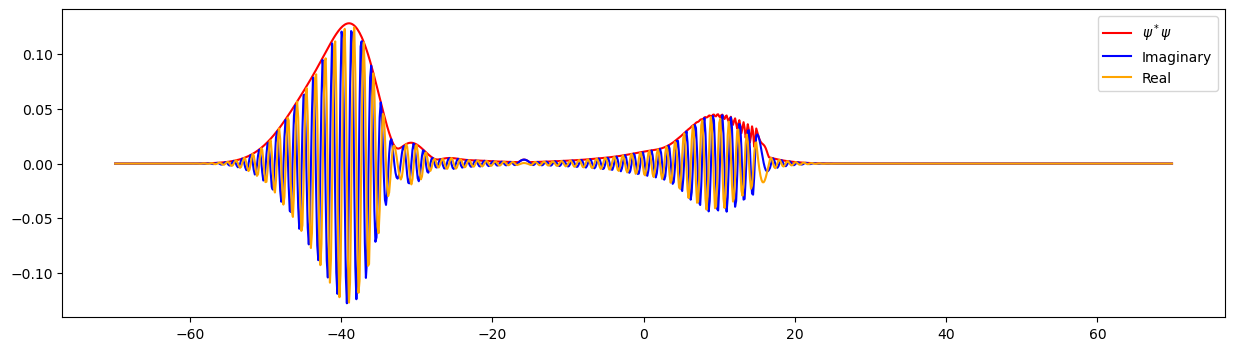

In [12]:
t = 15

fig, ax0 = plt.subplots(1,1,figsize = (15,4))
R1, = plt.plot(x[1:-1],np.abs(Psi(t))**1,color="red",label='$\psi^* \psi$')
#ax0.plot(x[1:-1],np.abs(psi_0)**2)
R2, = plt.plot(x[1:-1],np.imag(Psi(t)),color="blue",label='Imaginary')
R3, = plt.plot(x[1:-1],np.real(Psi(t)),color="orange",label='Real')
plt.legend(handles=[R1,R2,R3]);
ax0.legend(loc='upper right')

<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\USER\AppData\Local\Temp\ipykernel_15404\3537616524.py:4: SyntaxWarning: invalid escape sequence '\p'
  ln1, = plt.plot([],[],color="red",label='$\psi^* \psi$')


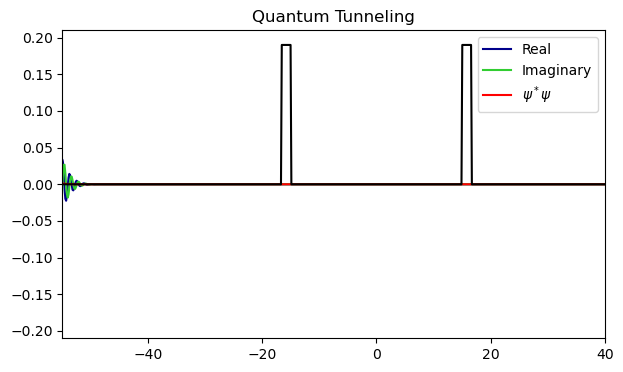

In [ ]:

# animation plot
fig, ax = plt.subplots(1,1,figsize = (7,4))
ln2, = plt.plot([],[],color="darkblue",label='Real')
ln3, = plt.plot([],[],color="limegreen",label='Imaginary')
ln1, = plt.plot([],[],color="red",label='$\psi^* \psi$')
ax.set_title('Quantum Tunneling')
ax.set_xlim(-55,40)
ax.set_ylim(-0.21,0.21)
ax.plot(x[1:-1],0.19/12.5*v[1:-1],color="black")
plt.legend(handles=[ln1,ln2,ln3]);
ax.legend(loc='upper right')

def animate(i):
    ln1.set_data(x[1:-1],np.abs(Psi(1/25*i))**2)
    ln2.set_data(x[1:-1],np.real(Psi(1/25*i)))
    ln3.set_data(x[1:-1],np.imag(Psi(1/25*i)))
ani = animation.FuncAnimation(fig,animate,frames=625,interval=50)   
ani.save('Quantum tunnelingfromjupiter.gif',writer='pillow',fps=30,dpi=100)